In [1]:
#Importing all the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

Loading the training dataset

In [5]:
data = pd.read_csv('C:/Users/Vaibhavi/Documents/Credit_Card_Fraud_Detection/fraudTrain.csv')

Loading the testing dataset

In [6]:
test_data = pd.read_csv('C:/Users/Vaibhavi/Documents/Credit_Card_Fraud_Detection/fraudTest.csv')

Initial observations of training dataset

In [8]:
print("Training Data:")
print(data.head())

Training Data:
   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1     Gill      F  43039 Riley Greens Sui

Initial observations of testing dataset

In [9]:
print("Testing Data:")
print(test_data.head())

Testing Data:
   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2020-06-21 12:14:25  2291163933867244   
1           1   2020-06-21 12:14:33  3573030041201292   
2           2   2020-06-21 12:14:53  3598215285024754   
3           3   2020-06-21 12:15:15  3591919803438423   
4           4   2020-06-21 12:15:17  3526826139003047   

                               merchant        category    amt   first  \
0                 fraud_Kirlin and Sons   personal_care   2.86    Jeff   
1                  fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                     fraud_Haley Group        misc_pos  60.05   Brian   
4                 fraud_Johnston-Casper          travel   3.19  Nathan   

       last gender                       street  ...      lat      long  \
0   Elliott      M            351 Darlene Green  ...  33.9659  -80.9355   
1  Williams      F             3638 Marsh Union 

PREPROCESSING

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [12]:
data.shape

(1296675, 23)

In [13]:
data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [14]:
# check for null values
data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

There are no null values in the dataset

In [15]:
#check for duplicates
data.duplicated().any()

False

There are no duplicates in the dataset

In [17]:
data['is_fraud'].nunique()

2

In [18]:
data.is_fraud.value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

<Axes: xlabel='is_fraud'>

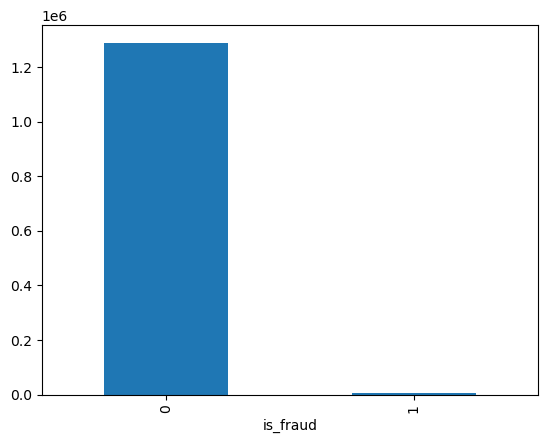

In [19]:
#visual representation of instances per class
data.is_fraud.value_counts().plot.bar()

In [22]:
#checking the percentage of each class in the dataset
(data.is_fraud.value_counts())/(data.is_fraud.count())

is_fraud
0    0.994211
1    0.005789
Name: count, dtype: float64

<Axes: ylabel='count'>

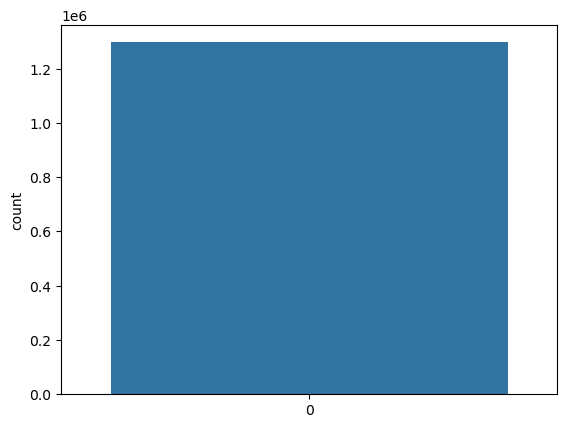

In [27]:
sns.countplot(data['is_fraud'])

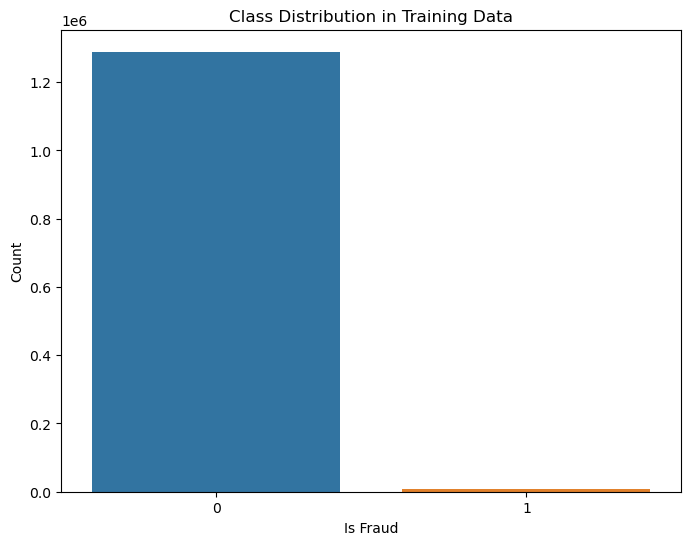

In [29]:
# Plot the distribution of the target variable in the training dataset
plt.figure(figsize=(8, 6))
sns.countplot(x='is_fraud', data=data)
plt.title('Class Distribution in Training Data')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.show()

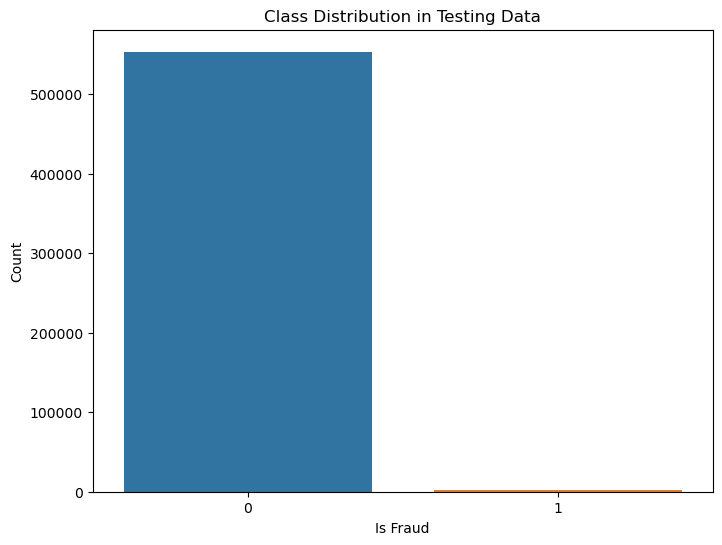

In [30]:
# Plot the distribution of the target variable in the testing dataset
plt.figure(figsize=(8, 6))
sns.countplot(x='is_fraud', data=test_data)
plt.title('Class Distribution in Testing Data')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.show()

CORRELATION MATRIX

In [34]:
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns

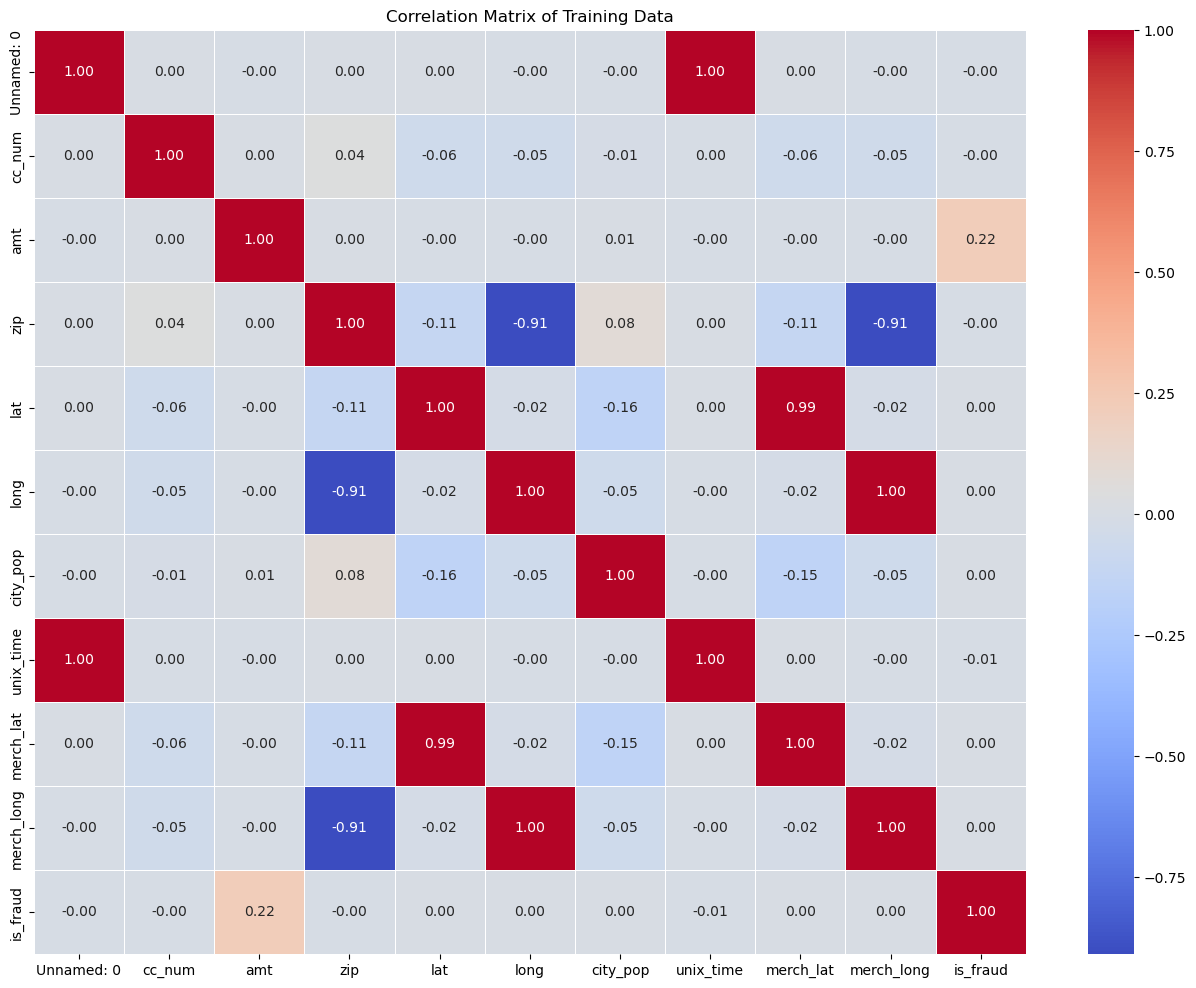

In [35]:
# Plot the correlation matrix for the training dataset
plt.figure(figsize=(16, 12))
corr_matrix = data[numeric_cols].corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Training Data')
plt.show()

C:\Users\Vaibhavi\Documents\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


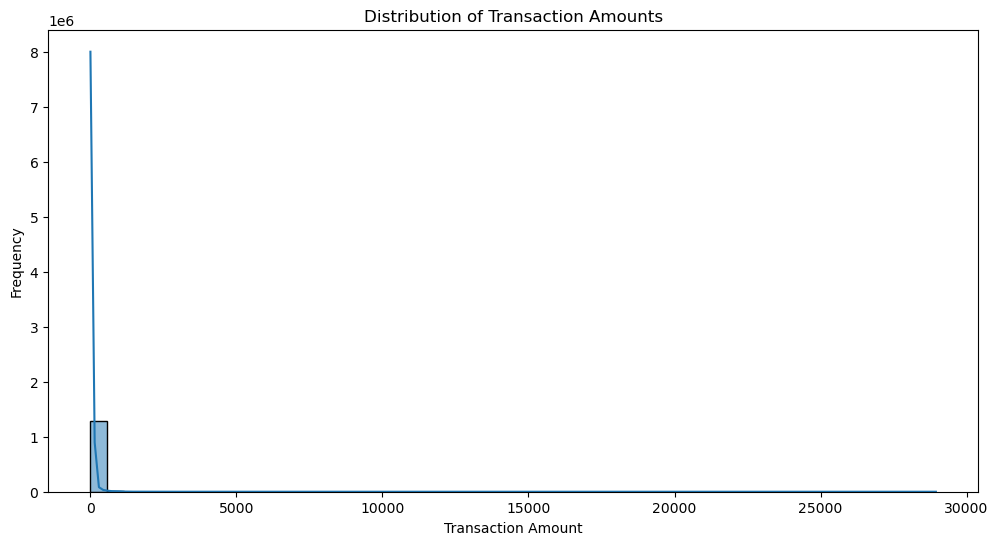

In [36]:
# Visualize the distribution of transaction amounts
plt.figure(figsize=(12, 6))
sns.histplot(data['amt'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

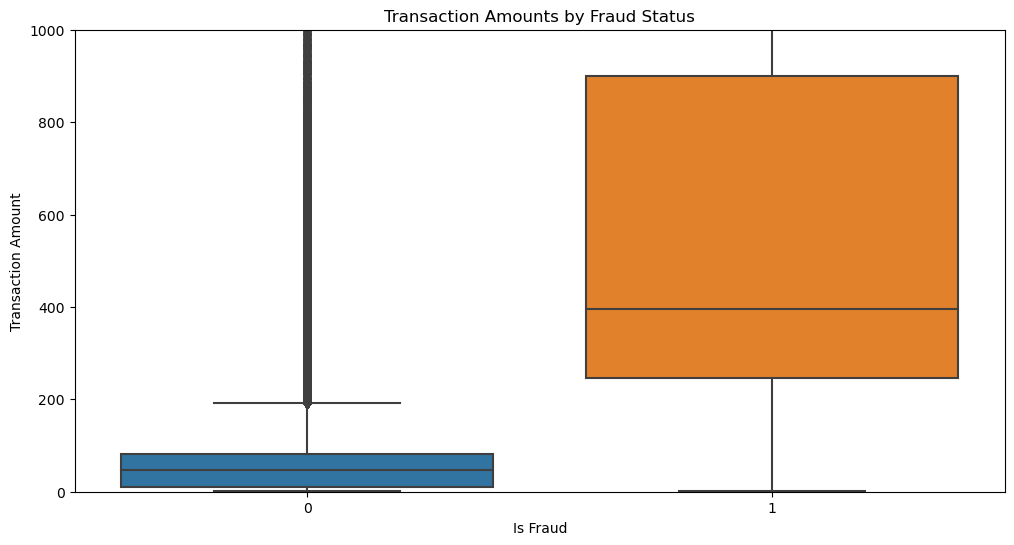

In [37]:
# Visualize the transaction amounts for fraud vs non-fraud cases
plt.figure(figsize=(12, 6))
sns.boxplot(x='is_fraud', y='amt', data=data)
plt.title('Transaction Amounts by Fraud Status')
plt.xlabel('Is Fraud')
plt.ylabel('Transaction Amount')
plt.ylim(0, 1000)  # Limiting y-axis for better visualization
plt.show()

NORMALIZATION 

In [40]:
from sklearn.preprocessing import StandardScaler

def select_numeric_columns(df):
    """Select numeric columns from a DataFrame."""
    return df.select_dtypes(exclude=['object'])

# Select numeric columns
train_numeric_data = select_numeric_columns(data)
test_numeric_data = select_numeric_columns(test_data)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numeric features in the training data
train_numeric_data = pd.DataFrame(scaler.fit_transform(train_numeric_data), columns=train_numeric_data.columns)

# Transform the numeric features in the test data
test_numeric_data = pd.DataFrame(scaler.transform(test_numeric_data), columns=test_numeric_data.columns)

# Add the target column back to the scaled data
train_numeric_data['is_fraud'] = data['is_fraud']
test_numeric_data['is_fraud'] = test_data['is_fraud']

# Display the first few rows of the scaled training data
print("Scaled Training Data:")
print(train_numeric_data.head())

# Display the first few rows of the scaled testing data
print("Scaled Testing Data:")
print(test_numeric_data.head())


Scaled Training Data:
   Unnamed: 0    cc_num       amt       zip       lat      long  city_pop  \
0   -1.732049 -0.316692 -0.407826 -0.749136 -0.484420  0.657620 -0.282589   
1   -1.732047 -0.318757  0.230039  1.872567  2.039120 -2.033870 -0.293670   
2   -1.732044 -0.318728  0.934149  1.281042  0.717754 -1.601537 -0.280406   
3   -1.732041 -0.316058 -0.158132  0.402753  1.515617 -1.590766 -0.287742   
4   -1.732039 -0.318471 -0.177094 -0.906090 -0.023035  0.782279 -0.293835   

   unix_time  merch_lat  merch_long  is_fraud  
0  -1.858664  -0.494354    0.593864         0  
1  -1.858662   2.078699   -2.030341         0  
2  -1.858662   0.902849   -1.592323         0  
3  -1.858660   1.662886   -1.621848         0  
4  -1.858651   0.026941    0.841909         0  
Scaled Testing Data:
   Unnamed: 0    cc_num       amt       zip       lat      long  city_pop  \
0   -1.732049 -0.317007 -0.420988 -0.728499 -0.900689  0.675252  0.810291   
1   -1.732047 -0.316028 -0.252695  1.308930  0.35129

MODEL BUILDING

1) LOGISTIC REGRESSION

In [49]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline

# Select relevant features and target
X = data.drop(['is_fraud', 'trans_date_trans_time', 'first', 'last', 'street', 'city', 'state', 'job', 'dob', 'trans_num'], axis=1)
y = data['is_fraud']

# Encode categorical variables
label_encoders = {}
for col in X.select_dtypes(include=['object']).columns:
    label_encoders[col] = LabelEncoder()
    X[col] = label_encoders[col].fit_transform(X[col])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the model
log_reg = LogisticRegression(random_state=42)

# Train the model
log_reg.fit(X_train, y_train)

# Predict using the model
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate the model
print("Logistic Regression:")
print(classification_report(y_test, y_pred_log_reg))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_log_reg))


Logistic Regression:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    386751
           1       0.00      0.00      0.00      2252

    accuracy                           0.99    389003
   macro avg       0.50      0.50      0.50    389003
weighted avg       0.99      0.99      0.99    389003

ROC AUC Score: 0.49972462902487647


ACCURACY OF LOGISTIC REGRESSION

In [50]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_log_reg)

# Print accuracy
print("Accuracy:", accuracy)


Accuracy: 0.9936632879437948


2) RANDOM FOREST

In [57]:
# Initialize the model with adjusted parameters
rand_forest = RandomForestClassifier(n_estimators=50, max_depth=10, max_features='sqrt', n_jobs=-1, random_state=42)

# Train the Random Forest model
rand_forest.fit(X_train, y_train)

# Predict using the Random Forest model
y_pred_rand_forest = rand_forest.predict(X_test)

# Calculate accuracy for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rand_forest)

# Print accuracy for Random Forest
print("Random Forest Accuracy:", accuracy_rf)


Random Forest Accuracy: 0.9965810032313376


3) DECISION TREE

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize the model with adjusted parameters
dec_tree = DecisionTreeClassifier(max_depth=10, random_state=42)

# Train the Decision Tree model
dec_tree.fit(X_train, y_train)

# Predict using the Decision Tree model
y_pred_dec_tree = dec_tree.predict(X_test)

# Calculate accuracy for Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dec_tree)

# Print accuracy for Decision Tree
print("Decision Tree Accuracy:", accuracy_dt)


Decision Tree Accuracy: 0.9969229029082038


In [60]:
# Print classification report of Decision tree
print("Classification Report:")
print(classification_report(y_test, y_pred_dec_tree))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    386751
           1       0.76      0.68      0.72      2252

    accuracy                           1.00    389003
   macro avg       0.88      0.84      0.86    389003
weighted avg       1.00      1.00      1.00    389003



In [61]:
# Print classification report of Random Forest
print("Classification Report:")
print(classification_report(y_test, y_pred_rand_forest))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    386751
           1       0.88      0.48      0.62      2252

    accuracy                           1.00    389003
   macro avg       0.94      0.74      0.81    389003
weighted avg       1.00      1.00      1.00    389003



VISUALIZATIONS FOR COMPARISON OF THESE THREE MODELS

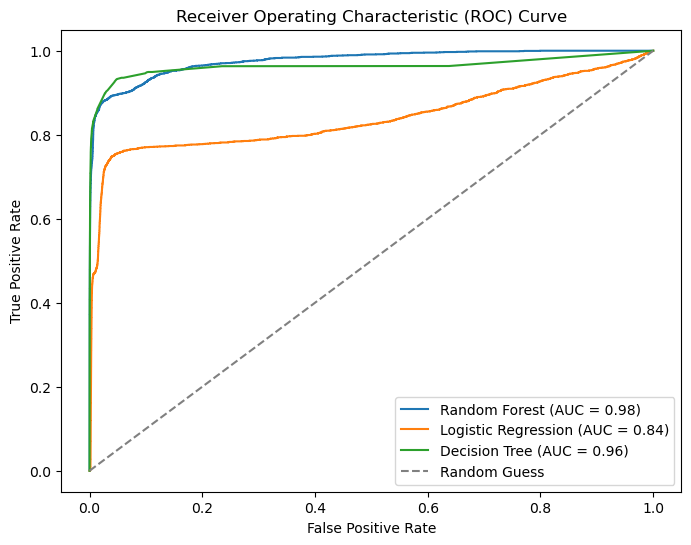

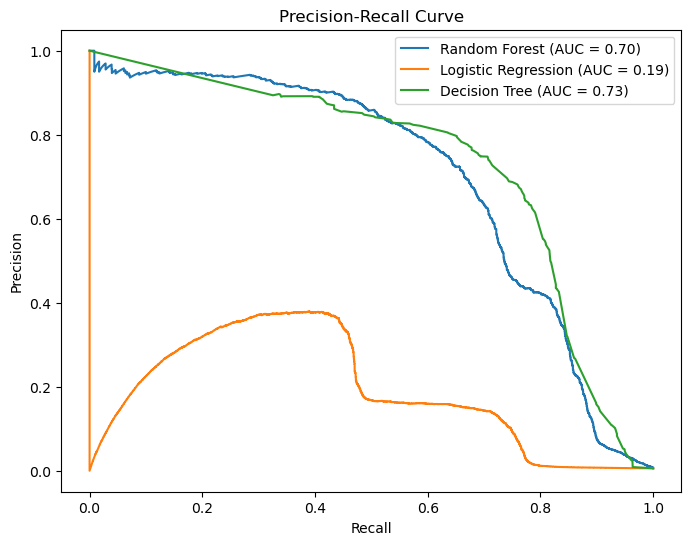

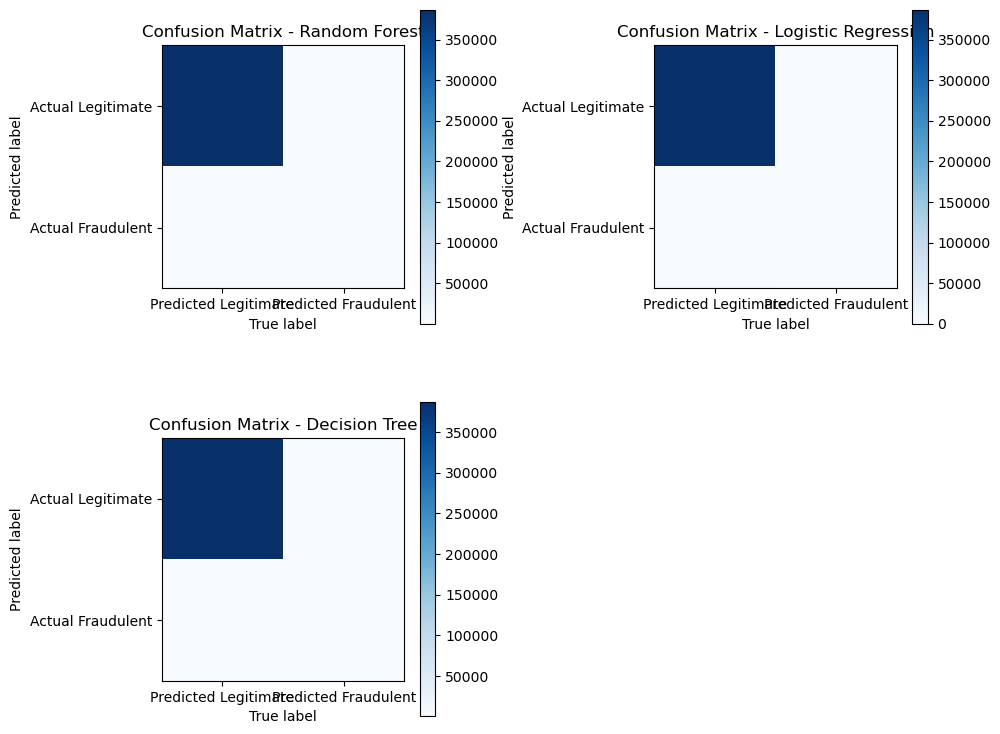

In [65]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc, confusion_matrix

# Define functions to plot ROC curve and Precision-Recall curve
def plot_roc_curve(y_true, y_scores, label):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    auc_score = roc_auc_score(y_true, y_scores)
    plt.plot(fpr, tpr, label=label + f' (AUC = {auc_score:.2f})')

def plot_precision_recall_curve(y_true, y_scores, label):
    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    auc_score = auc(recall, precision)
    plt.plot(recall, precision, label=label + f' (AUC = {auc_score:.2f})')

# Plot ROC curve
plt.figure(figsize=(8, 6))
plot_roc_curve(y_test, rand_forest.predict_proba(X_test)[:, 1], label='Random Forest')
plot_roc_curve(y_test, log_reg.predict_proba(X_test)[:, 1], label='Logistic Regression')
plot_roc_curve(y_test, dec_tree.predict_proba(X_test)[:, 1], label='Decision Tree')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plot_precision_recall_curve(y_test, rand_forest.predict_proba(X_test)[:, 1], label='Random Forest')
plot_precision_recall_curve(y_test, log_reg.predict_proba(X_test)[:, 1], label='Logistic Regression')
plot_precision_recall_curve(y_test, dec_tree.predict_proba(X_test)[:, 1], label='Decision Tree')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Plot Confusion Matrix Heatmap
plt.figure(figsize=(10, 8))
models = [rand_forest, log_reg, dec_tree]
model_names = ['Random Forest', 'Logistic Regression', 'Decision Tree']
for i, model in enumerate(models):
    plt.subplot(2, 2, i+1)
    cm = confusion_matrix(y_test, model.predict(X_test))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix - {model_names[i]}')
    plt.colorbar()
    plt.xticks([0, 1], ['Predicted Legitimate', 'Predicted Fraudulent'])
    plt.yticks([0, 1], ['Actual Legitimate', 'Actual Fraudulent'])
    plt.xlabel('True label')
    plt.ylabel('Predicted label')
plt.tight_layout()
plt.show()


THANK YOU !!!